<a href="https://colab.research.google.com/github/punramon/python_dataviz2024/blob/main/HR_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_hr = '/content/drive/MyDrive/data_viz_2024_DATA/project/HR.csv'

In [ ]:
hr = pd.read_csv(path_to_hr)
hr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## Data Preprocessing

In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

In [ ]:
count_percent(hr)

,Count Missing,Percent Missing
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


> เติมข้อมูลกับข้อมูลที่มีค่าว่างต่ำกว่า 3%

In [ ]:
# prompt: เติมข้อมูล enrolled_university, education_level, experience, last_new_job ด้วย mode

for column in ['enrolled_university', 'education_level', 'experience', 'last_new_job']:
  hr[column].fillna(hr[column].mode()[0], inplace=True)

hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<ipython-input-54-46f3d7666416>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr[column].fillna(hr[column].mode()[0], inplace=True)


In [ ]:
count_percent(hr)

,Count Missing,Percent Missing
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,0,0.000000
education_level,0,0.000000
major_discipline,2813,14.683161
experience,0,0.000000
company_size,5938,30.994885


> สำหรับค่าที่ว่างเกิน 10% จะให้เป็น unknown

In [ ]:
# prompt: สำหรับค่าที่ว่างเกิน 10% จะให้เป็น unknown

for column in hr.columns:
  if hr[column].isnull().sum() * 100 / hr.shape[0] > 10:
    hr[column].fillna('unknown', inplace=True)

hr.info()
count_percent(hr)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<ipython-input-56-07d0d4050fcc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr[column].fillna('unknown', inplace=True)


,Count Missing,Percent Missing
enrollee_id,0,0.0
city,0,0.0
city_development_index,0,0.0
gender,0,0.0
relevent_experience,0,0.0
enrolled_university,0,0.0
education_level,0,0.0
major_discipline,0,0.0
experience,0,0.0
company_size,0,0.0


>

> ปรับแต่งข้อมูล

In [ ]:
hr['city'] = hr['city'].str.replace('city_', '')

In [ ]:
hr['company_size'] = hr['company_size'].replace('10/49', '10-49')

In [ ]:
hr['relevent_experience'] = hr['relevent_experience'].replace({'Has relevent experience': 'Yes', 'No relevent experience': 'No'})

In [ ]:
hr['experience'] = hr['experience'].replace('20+','>20')

In [ ]:
hr.head(20)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,unknown,unknown,1,36,1.0
1,29725,40,0.776,Male,No,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,unknown,No,Full time course,Graduate,STEM,5,unknown,unknown,never,83,0.0
3,33241,115,0.789,unknown,No,no_enrollment,Graduate,Business Degree,<1,unknown,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Yes,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,176,0.764,unknown,Yes,Part time course,Graduate,STEM,11,unknown,unknown,1,24,1.0
6,28806,160,0.920,Male,Yes,no_enrollment,High School,unknown,5,50-99,Funded Startup,1,24,0.0
7,402,46,0.762,Male,Yes,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,103,0.920,unknown,Yes,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

> Save data

In [ ]:
hr.to_csv('/content/drive/MyDrive/data_viz_2024_DATA/project/hr_overview.csv', index=False)

> explore data

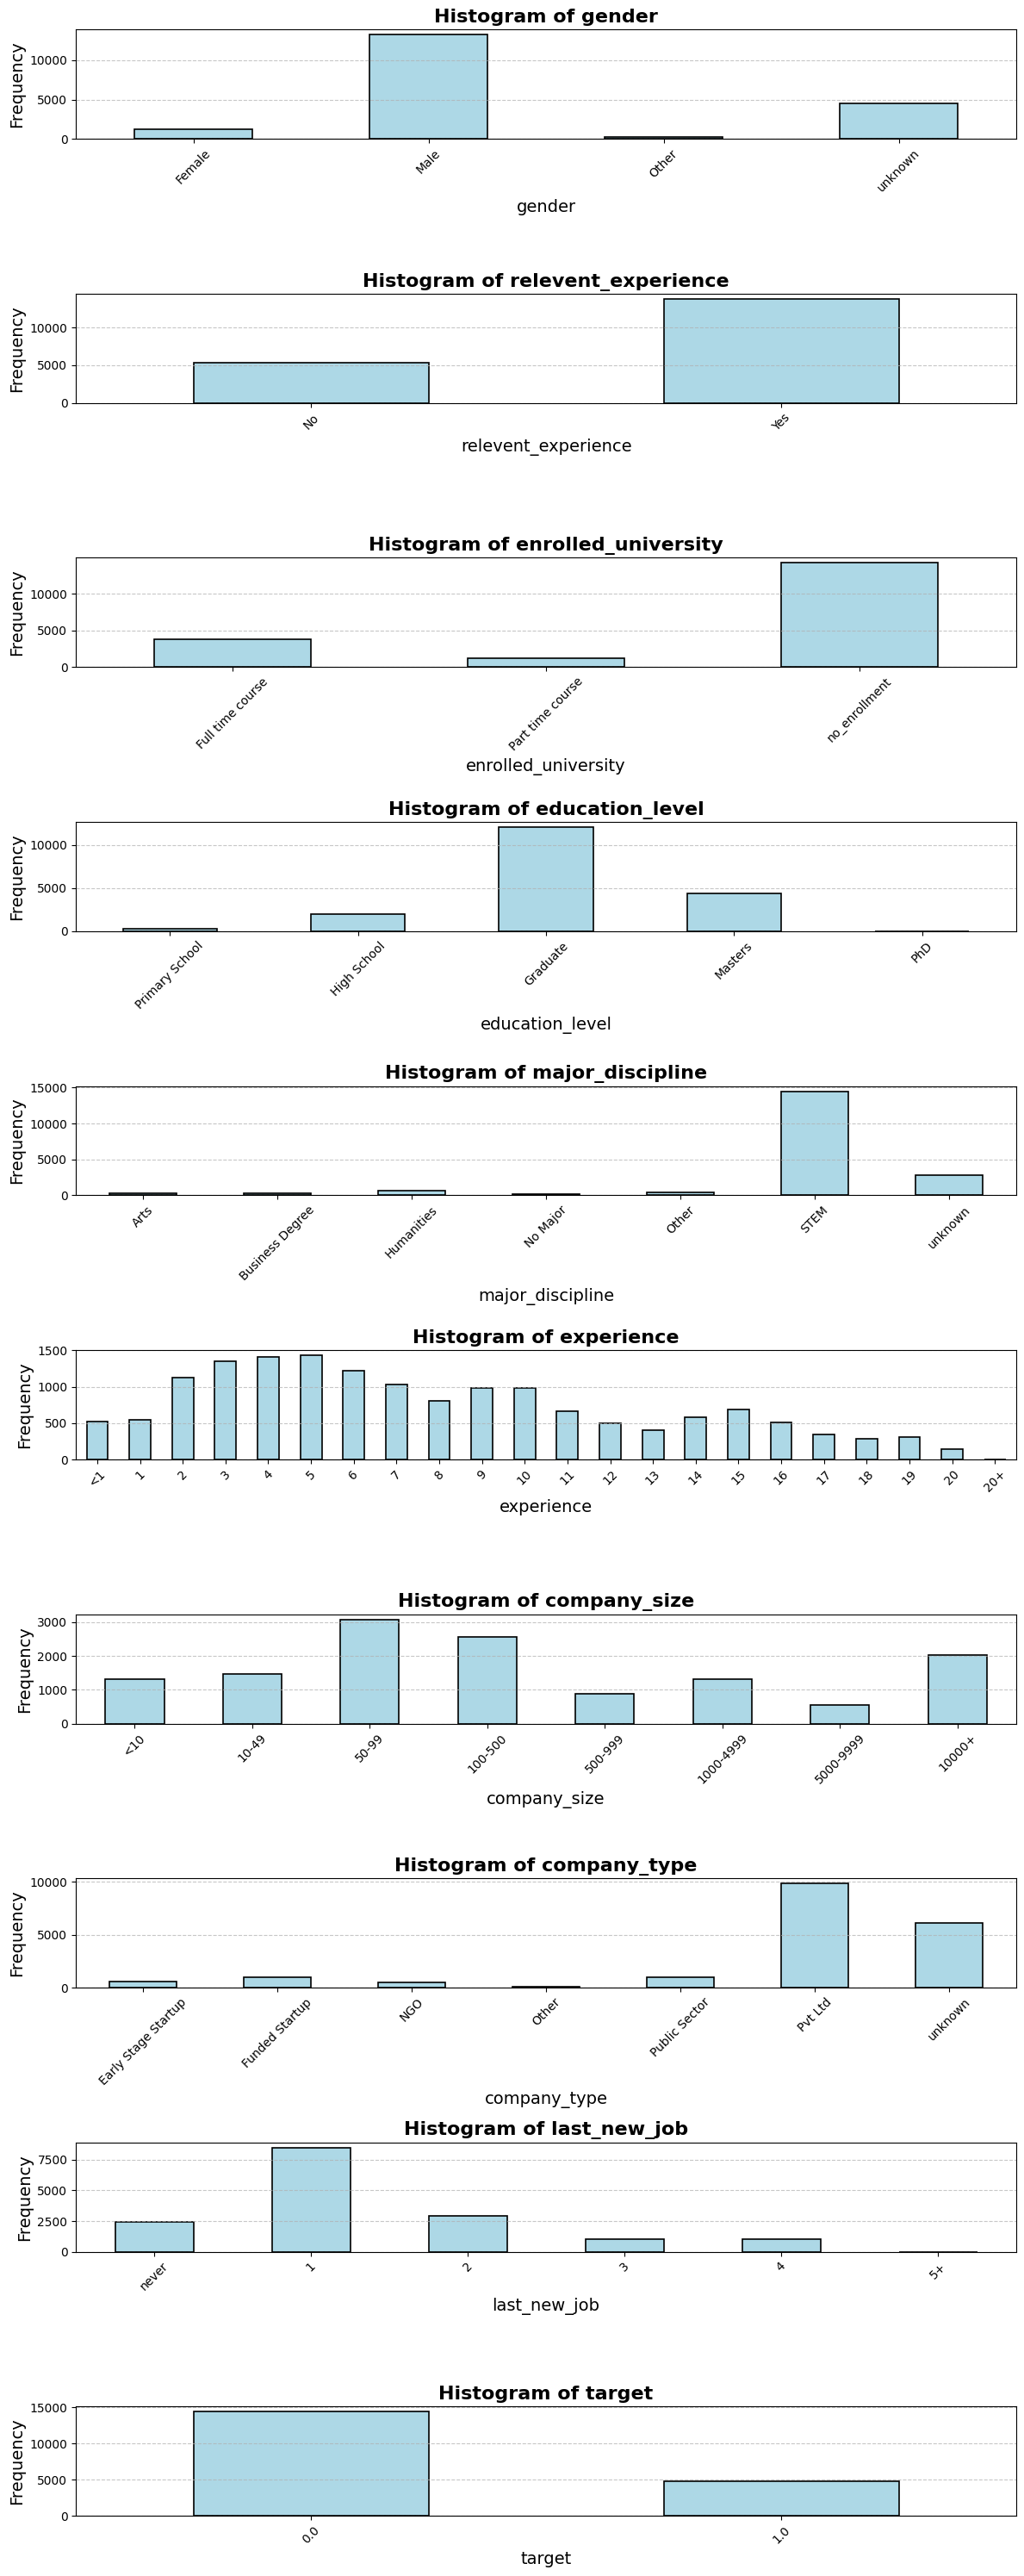

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# List of columns to plot histograms for, excluding specific columns
excluded_columns = ['enrollee_id', 'city_development_index', 'city', 'training_hours']
cols_to_plot = [col for col in hr.columns if col not in excluded_columns]

# Define ordered categories for specific columns
experience_order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                    '13', '14', '15', '16', '17', '18', '19', '20', '20+']
company_size_order = ['<10', '10-49', '50-99', '100-500', '500-999', '1000-4999',
                      '5000-9999', '10000+']
last_new_job_order = ['never', '1', '2', '3', '4', '5+']
education_level_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'PhD']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(12, 30))  # Adjust size as needed

# Iterate through columns and create histograms
for i, col in enumerate(cols_to_plot):
    if col == 'experience':
        hr[col] = pd.Categorical(hr[col], categories=experience_order, ordered=True)
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)
    elif col == 'company_size':
        hr[col] = pd.Categorical(hr[col], categories=company_size_order, ordered=True)
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)
    elif col == 'last_new_job':
        hr[col] = pd.Categorical(hr[col], categories=last_new_job_order, ordered=True)
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)
    elif col == 'education_level':
        hr[col] = pd.Categorical(hr[col], categories=education_level_order, ordered=True)
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)
    else:
        hr[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black', linewidth=1.2)

    # Set titles and labels
    axes[i].set_title(f'Histogram of {col}', fontsize=16, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)

    # Add grid for better readability
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Set x-tick labels rotation for better visibility
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()




# Extract data

In [36]:
import pandas as pd
import os

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_hr_ov = '/content/drive/MyDrive/data_viz_2024_DATA/project/hr_overview.csv'

In [38]:
hr_ov = pd.read_csv(path_to_hr_ov)
hr_ov

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,unknown,unknown,1,36,1.0
1,29725,40,0.776,Male,No,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,unknown,No,Full time course,Graduate,STEM,5,unknown,unknown,never,83,0.0
3,33241,115,0.789,unknown,No,no_enrollment,Graduate,Business Degree,<1,unknown,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Yes,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,No,no_enrollment,Graduate,Humanities,14,unknown,unknown,1,42,1.0
19154,31398,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,14,unknown,unknown,4,52,1.0
19155,24576,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,65,0.802,Male,Yes,no_enrollment,High School,unknown,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
hr_ov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

In [41]:
import numpy as np

In [42]:
import pandas as pd

# ฟังก์ชันคำนวณคะแนนการศึกษา โดยใช้ weight
def calculate_weighted_education_score(row):
    score = 0

    # น้ำหนักสำหรับ education_level
    education_weights = {
        'Primary School': 1,
        'High School': 3,
        'Graduate': 5,
        'Masters': 7,
        'PhD': 9
    }
    score += education_weights.get(row['education_level'], 0) * 1.5  # เพิ่มน้ำหนัก

    # น้ำหนักสำหรับ major_discipline
    discipline_weights = {
        'STEM': 3,
        'Humanities': 1,
        'Other': 1,
        'Business Degree': 2,
        'Arts': 1
    }
    score += discipline_weights.get(row['major_discipline'], 0) * 1.2  # เพิ่มน้ำหนัก

    # น้ำหนักสำหรับ enrolled_university
    enrollment_weights = {
        'no_enrollment': 0,
        'Part time course': 2,
        'Full time course': 3
    }
    score += enrollment_weights.get(row['enrolled_university'], 0) * 1.0  # เพิ่มน้ำหนัก

    return score  # คืนคะแนนรวม

# คำนวณคะแนนการศึกษา
hr_ov['education_score'] = hr_ov.apply(calculate_weighted_education_score, axis=1)

# Normalization โดยให้คะแนนสูงสุดอยู่ที่ 10
max_score = hr_ov['education_score'].max()
hr_ov['education_score'] = (hr_ov['education_score'] / max_score) * 10

# แสดงผลลัพธ์
print(hr_ov[['education_score']].head())


   education_score
0         6.491228
1         6.491228
2         8.245614
3         5.789474
4         8.245614


In [43]:
import pandas as pd

def calculate_weighted_experience_score(row):
    """Calculates experience score based on experience and relevant experience."""
    # ตรวจสอบว่า experience เป็น 'unknown'
    if row['experience'] == 'unknown':
        return 'unknown'  # คืนค่า 'unknown' ถ้าข้อมูลเป็น 'unknown'

    score = 0

    try:
        # แปลงค่า experience เป็น int
        experience = int(row['experience'])
        # คำนวณคะแนนตามช่วงของประสบการณ์
        if experience <= 5:
            score += experience * 1.5
        elif experience > 5 and experience <= 10:
            score += 5 * 1.5 + (experience - 5) * 1
        elif experience > 10 and experience <= 20:
            score += 5 * 1.5 + 5 * 1 + (experience - 10) * 0.5
        elif experience > 20:
            score += 5 * 1.5 + 5 * 1 + 10 * 0.5 + (experience - 20) * 0.25

        # เพิ่มคะแนนสำหรับ relevant_experience
        if row['relevent_experience'] == 'Yes':
            score += 2
    except ValueError:
        if row['experience'] == '<1':
            score += 1
        elif row['experience'] == '>20':
            score += 10
        else:
            pass

    # Normalize คะแนนให้เต็ม 10
    # คะแนนสูงสุดในกรณีที่มีประสบการณ์ 20+ และมี relevant_experience คือ 10
    max_score = 10
    normalized_score = (score / max_score) * 10

    return min(normalized_score, 10)  # คืนคะแนนไม่เกิน 10

# คำนวณคะแนนการประสบการณ์
hr_ov['experience_score'] = hr_ov.apply(calculate_weighted_experience_score, axis=1)

# ตรวจสอบค่าที่ได้ในคอลัมน์ experience_score
print(hr_ov[['experience', 'experience_score']].head())




  experience  experience_score
0        >20              10.0
1         15              10.0
2          5               7.5
3         <1               1.0
4        >20              10.0


In [44]:
# prompt: สร้างตัวแปร 'training_score' โดยคำนวณจาก training_hours โดยให้คะแนนเต็ม 10

def calculate_training_score(row):
    """Calculates training score based on training_hours."""
    training_hours = row['training_hours']

    # ตรวจสอบว่ามีข้อมูล training_hours หรือไม่
    if pd.isnull(training_hours):
        return 'unknown'  # คืนค่า 'unknown' หากไม่มีข้อมูล

    max_hours = hr_ov['training_hours'].max()  # ชั่วโมงสูงสุดใน training_hours

    # คำนวณคะแนนการฝึกอบรม
    score = (training_hours / max_hours) * 10

    return min(score, 10)  # Ensure score doesn't exceed 10

# คำนวณคะแนนการฝึกอบรม
hr_ov['training_score'] = hr_ov.apply(calculate_training_score, axis=1)

# ตรวจสอบค่าที่ได้ในคอลัมน์ training_score
print(hr_ov[['training_hours', 'training_score']].head())


   training_hours  training_score
0              36        1.071429
1              47        1.398810
2              83        2.470238
3              52        1.547619
4               8        0.238095


In [45]:
# prompt: คำนวณ 'company_exposure' จาก Company size และ Company type โดยคะแนนเต็ม 10 ถ้า unknown ให้ return unknown
import pandas as pd

def calculate_company_exposure(row):
    """Calculates company exposure score based on company_size and company_type."""
    # ตรวจสอบข้อมูลที่เป็น 'unknown'
    if row['company_size'] == 'unknown' or row['company_type'] == 'unknown':
        return 'unknown'  # คืนค่า 'unknown' หากข้อมูลเป็น 'unknown'

    score = 0
    weight_company_size = 0.6  # น้ำหนักให้กับ company_size
    weight_company_type = 0.4   # น้ำหนักให้กับ company_type

    # คะแนนตามขนาดบริษัท
    if row['company_size'] == '<10':
        score += 2 * weight_company_size
    elif row['company_size'] == '10-49':
        score += 3 * weight_company_size
    elif row['company_size'] == '50-99':
        score += 4 * weight_company_size
    elif row['company_size'] == '100-500':
        score += 5 * weight_company_size
    elif row['company_size'] == '500-999':
        score += 6 * weight_company_size
    elif row['company_size'] == '1000-4999':
        score += 7 * weight_company_size
    elif row['company_size'] == '5000-9999':
        score += 8 * weight_company_size
    elif row['company_size'] == '10000+':
        score += 9 * weight_company_size

    # คะแนนตามประเภทบริษัท
    if row['company_type'] == 'Pvt Ltd':
        score += 4 * weight_company_type
    elif row['company_type'] == 'Funded Startup':
        score += 6 * weight_company_type
    elif row['company_type'] == 'Public Sector':
        score += 3 * weight_company_type
    elif row['company_type'] == 'NGO':
        score += 2 * weight_company_type
    elif row['company_type'] == 'Early Stage Startup':
        score += 5 * weight_company_type
    elif row['company_type'] == 'Other':
        score += 1 * weight_company_type

    return score  # คืนคะแนนรวม

# คำนวณคะแนน
hr_ov['company_exposure_raw'] = hr_ov.apply(calculate_company_exposure, axis=1)

# Normalize คะแนนให้อยู่ในช่วง 0-10
def normalize_score(score, min_score, max_score):
    """Normalize score to a scale of 0-10."""
    if score == 'unknown':
        return 'unknown'
    normalized = (score - min_score) / (max_score - min_score) * 10
    return min(max(normalized, 0), 10)  # Ensure score is within 0-10

# Filter out 'unknown' values before calculating min and max
# แก้ไข: กรองค่า 'unknown' ออกก่อนคำนวณค่าต่ำสุดและสูงสุด
numerical_exposure = hr_ov['company_exposure_raw'][hr_ov['company_exposure_raw'] != 'unknown']
# แปลง numerical_exposure เป็นตัวเลข
numerical_exposure = pd.to_numeric(numerical_exposure)


# คำนวณค่าต่ำสุดและค่าสูงสุดของคะแนนจากข้อมูลที่เป็นตัวเลข
min_score = numerical_exposure.min()
max_score = numerical_exposure.max()

# Normalize คะแนน
hr_ov['company_exposure'] = hr_ov['company_exposure_raw'].apply(lambda x: normalize_score(x, min_score, max_score))

# ตรวจสอบค่าที่ได้ในคอลัมน์ company_exposure
print(hr_ov[['company_size', 'company_type', 'company_exposure_raw', 'company_exposure']].head())

  company_size    company_type company_exposure_raw company_exposure
0      unknown         unknown              unknown          unknown
1        50-99         Pvt Ltd                  4.0         4.444444
2      unknown         unknown              unknown          unknown
3      unknown         Pvt Ltd              unknown          unknown
4        50-99  Funded Startup                  4.8         5.925926


In [46]:
import pandas as pd

# Function to convert last_new_job to a score
def last_new_job_score(last_new_job):
    if last_new_job == '<1':
        return 1
    elif last_new_job == '1':
        return 2
    elif last_new_job == '2':
        return 3
    elif last_new_job == '3':
        return 4
    elif last_new_job == '4':
        return 5
    elif last_new_job == 'never':
        return 0
    else:
        return 6  # for '5+', or any unknown value

# Function to calculate career progression
def calculate_career_progression(row):
    # Get the last_new_job_score
    job_score = last_new_job_score(row['last_new_job'])

    # Calculate the career progression score
    career_progression = (row['education_score'] + row['experience_score']) / (1 + job_score)

    return career_progression

# Apply the function to calculate raw career progression scores
hr_ov['career_progression_raw'] = hr_ov.apply(calculate_career_progression, axis=1)

# Normalize career progression to a 0-10 scale
min_score = hr_ov['career_progression_raw'].min()
max_score = hr_ov['career_progression_raw'].max()

# Avoid division by zero
if max_score > min_score:
    hr_ov['career_progression'] = (hr_ov['career_progression_raw'] - min_score) / (max_score - min_score) * 10
else:
    hr_ov['career_progression'] = 0  # All values are the same if max == min

# Display the first few rows to verify
print(hr_ov[['education_score', 'experience_score', 'last_new_job', 'career_progression']].head())


   education_score  experience_score last_new_job  career_progression
0         6.491228              10.0            1            2.649985
1         6.491228              10.0           >4            1.058046
2         8.245614               7.5        never            7.843897
3         5.789474               1.0        never            3.304966
4         8.245614              10.0            4            1.405225


In [47]:
hr_ov = hr_ov.drop(['company_exposure_raw', 'career_progression_raw'], axis=1)

In [48]:
hr_ov.head(30)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,education_score,experience_score,training_score,company_exposure,career_progression
0,8949,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,unknown,unknown,1,36,1.0,6.491228,10.0,1.071429,unknown,2.649985
1,29725,40,0.776,Male,No,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,6.491228,10.0,1.398810,4.444444,1.058046
2,11561,21,0.624,unknown,No,Full time course,Graduate,STEM,5,unknown,unknown,never,83,0.0,8.245614,7.5,2.470238,unknown,7.843897
3,33241,115,0.789,unknown,No,no_enrollment,Graduate,Business Degree,<1,unknown,Pvt Ltd,never,52,1.0,5.789474,1.0,1.547619,unknown,3.304966
4,666,162,0.767,Male,Yes,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,8.245614,10.0,0.238095,5.925926,1.405225
5,21651,176,0.764,unknown,Yes,Part time course,Graduate,STEM,11,unknown,unknown,1,24,1.0,7.660819,10.0,0.714286,unknown,2.847566
6,28806,160,0.920,Male,Yes,no_enrollment,High School,unknown,5,50-99,Funded Startup,1,24,0.0,2.631579,9.5,0.714286,5.925926,1.913502
7,402,46,0.762,Male,Yes,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0,6.491228,10.0,0.535714,2.222222,1.058046
8,27107,103,0.920,Male,Yes,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0,6.491228,10.0,1.369048,4.444444,2.649985
9,699,103,0.920,unknown,Yes,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0,6.491228,10.0,3.660714,10.0,1.058046


In [ ]:
hr_ov.describe()

,enrollee_id,city,city_development_index,training_hours,target,education_score,experience_score,training_score,career_progression
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,80.128876,0.828848,65.366896,0.249348,6.530813,8.510700,1.945443,2.418953
std,9616.292592,46.413570,0.123362,60.058462,0.432647,1.861612,2.553477,1.787454,1.693364
min,1.000000,1.000000,0.448000,1.000000,0.000000,0.701754,1.000000,0.029762,0.000000
25%,8554.250000,21.000000,0.740000,23.000000,0.000000,6.491228,8.000000,0.684524,1.273339
50%,16982.500000,101.000000,0.903000,47.000000,0.000000,6.491228,10.000000,1.398810,2.017232
75%,25169.750000,104.000000,0.920000,88.000000,0.000000,8.245614,10.000000,2.619048,2.649985
max,33380.000000,180.000000,0.949000,336.000000,1.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
hr_ov.to_csv('/content/drive/MyDrive/data_viz_2024_DATA/project/enrollee_profile.csv', index=False)

In [ ]:
city_counts_df = hr_ov['city'].value_counts().reset_index()
city_counts_df.columns = ['city', 'count']
print(city_counts_df)

     city  count
0     103   4355
1      21   2702
2      16   1533
3     114   1336
4     160    845
..    ...    ...
118   129      3
119   111      3
120   121      3
121   140      1
122   171      1

[123 rows x 2 columns]


In [ ]:
pip install dash

In [51]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import numpy as np

app = dash.Dash(__name__)

# สร้าง mapping ของ education level เป็นตัวเลข
education_levels = hr_ov['education_level'].unique()
education_level_map = {level: i for i, level in enumerate(education_levels)}

app.layout = html.Div([
    html.H1("HR Data Analysis: Parallel Coordinates Plot"),
    dcc.Checklist(
        id='education-level-checklist',
        options=[{'label': level, 'value': level} for level in education_levels],
        value=education_levels,
        inline=True
    ),
    dcc.Graph(id='parallel-coordinates-plot')
])

@app.callback(
    Output('parallel-coordinates-plot', 'figure'),
    [Input('education-level-checklist', 'value')]
)
def update_graph(selected_levels):
    filtered_df = hr_ov[hr_ov['education_level'].isin(selected_levels)]

    # Map education level to numeric values for coloring
    color_values = filtered_df['education_level'].map(education_level_map)

    dimensions = [
        dict(label='Education Score', values=filtered_df['education_score']),
        dict(label='Experience Score', values=filtered_df['experience_score']),
        dict(label='Training Score', values=filtered_df['training_score']),
        dict(label='Company Exposure', values=filtered_df['company_exposure']),
        dict(label='Career Progression', values=filtered_df['career_progression'])
    ]

    fig = go.Figure(data=go.Parcoords(
        line=dict(
            color=color_values,
            colorscale='Viridis',
            showscale=True,
            cmin=0,  # Minimum value for color scale
            cmax=len(education_levels)-1  # Maximum value for color scale
        ),
        dimensions=dimensions
    ))

    # เพิ่ม colorbar ที่แสดงความหมายของสี
    colorbar_tickvals = [education_level_map[level] for level in selected_levels]
    colorbar_ticktext = selected_levels
    fig.update_layout(
        coloraxis_colorbar=dict(
            title='Education Level',
            tickvals=colorbar_tickvals,  # Mapping numeric values to education levels
            ticktext=colorbar_ticktext   # Labels corresponding to the tickvals
        ),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

* yellow : Primary School
* green : Phd
* dark green : High School
* dark blue : Master
* purple : Graduate



## buble chart

In [64]:
import plotly.express as px
import pandas as pd


# สร้าง Bubble Chart
fig = px.scatter(
    hr_ov,
    x='education_score',             # แกน x
    y='career_progression',            # แกน y
    size='training_score',           # ขนาดของจุด
    color='education_level',         # สีของจุดตามระดับการศึกษา
    hover_name='education_level',    # ข้อมูลที่แสดงเมื่อเลื่อนเมาส์ไปที่จุด
    title='Bubble Chart of HR Data', # ชื่อกราฟ
    labels={'education_score': 'career_progression', 'experience_score': 'Experience Score'},  # ป้ายแกน
    color_continuous_scale='Viridis' # สเกลสี
)

# แสดงกราฟ
fig.show()

## Parallel Sets

In [54]:
hr_ov_filtered = hr_ov[(hr_ov != 'unknown').all(axis=1)]
graph_df = hr_ov_filtered[['gender', 'education_level', 'enrolled_university']].value_counts().reset_index()
graph_df.columns = ['gender', 'education_level', 'enrolled_university','count']
print(graph_df)

    gender education_level enrolled_university  count
0     Male        Graduate       no_enrollment   4756
1     Male         Masters       no_enrollment   1958
2     Male        Graduate    Full time course    578
3   Female        Graduate       no_enrollment    441
4     Male        Graduate    Part time course    386
5   Female         Masters       no_enrollment    217
6     Male             Phd       no_enrollment    202
7     Male         Masters    Full time course    174
8     Male         Masters    Part time course     88
9    Other        Graduate       no_enrollment     51
10  Female        Graduate    Full time course     48
11  Female             Phd       no_enrollment     39
12  Female        Graduate    Part time course     39
13  Female         Masters    Full time course     19
14   Other         Masters       no_enrollment     12
15    Male             Phd    Part time course      7
16   Other        Graduate    Full time course      7
17   Other        Graduate  

In [56]:
import plotly.graph_objects as go
import pandas as pd
import colorsys

# Create the DataFrame

df = graph_df

# Function to generate beautiful colors
def generate_colors(n, s=0.7, v=0.9):
    colors = []
    for i in range(n):
        hue = i/n
        rgb = colorsys.hsv_to_rgb(hue, s, v)
        colors.append(f'rgb({int(rgb[0]*255)},{int(rgb[1]*255)},{int(rgb[2]*255)})')
    return colors

# Create node labels with better formatting
def format_label(label):
    return label.replace('_', ' ').title()

gender_labels = df['gender'].unique().tolist()
education_labels = df['education_level'].unique().tolist()
enrollment_labels = [format_label(label) for label in df['enrolled_university'].unique()]

# Create nodes list
nodes = gender_labels + education_labels + enrollment_labels

# Generate beautiful colors for each category
gender_colors = generate_colors(len(gender_labels), s=0.6, v=0.9)
education_colors = generate_colors(len(education_labels), s=0.7, v=0.85)
enrollment_colors = generate_colors(len(enrollment_labels), s=0.8, v=0.8)

node_colors = gender_colors + education_colors + enrollment_colors

# Create source, target, and value arrays
source = []
target = []
value = []
link_colors = []

# Gender to Education Level
for _, row in df.iterrows():
    # First flow: Gender to Education
    source.append(gender_labels.index(row['gender']))
    target.append(len(gender_labels) + education_labels.index(row['education_level']))
    value.append(row['count'])
    link_colors.append(f'rgba{tuple(int(c) for c in gender_colors[gender_labels.index(row["gender"])][4:-1].split(",")) + (0.4,)}')

    # Second flow: Education to Enrollment
    source.append(len(gender_labels) + education_labels.index(row['education_level']))
    target.append(len(gender_labels) + len(education_labels) +
                 enrollment_labels.index(format_label(row['enrolled_university'])))
    value.append(row['count'])
    link_colors.append(f'rgba{tuple(int(c) for c in education_colors[education_labels.index(row["education_level"])][4:-1].split(",")) + (0.4,)}')

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 20,
        thickness = 30,
        line = dict(color = "black", width = 0.5),
        label = nodes,
        color = node_colors,
        customdata = nodes,
        hovertemplate='Node: %{customdata}<br>Total Flow: %{value}<extra></extra>'
    ),
    link = dict(
        source = source,
        target = target,
        value = value,
        color = link_colors,
        hovertemplate='From: %{source.customdata}<br>'+
                      'To: %{target.customdata}<br>'+
                      'Flow: %{value}<extra></extra>'
    )
)])

# Update layout with more professional styling and adjusted title
fig.update_layout(
    title=dict(
        text="Educational Pipeline Analysis:<br>Gender → Education Level → Enrollment Status",
        font=dict(size=24, color='#444', family='Arial, sans-serif'),
        y=0.98,  # Move the title slightly higher
        x=0.5,   # Center the title
        xanchor='center',
        yanchor='top'
    ),
    font=dict(size=12, family='Arial, sans-serif'),
    plot_bgcolor='white',
    paper_bgcolor='#fafafa',
    height=900,
    width=1200,
    margin=dict(t=120, l=50, r=50, b=50)  # Increase top margin to accommodate annotations
)

# Add annotations for category labels with adjusted positions
fig.add_annotation(
    x=0.1, y=1.08,
    text="Gender",
    showarrow=False,
    font=dict(size=16, color='#666'),
    xref="paper", yref="paper"
)

fig.add_annotation(
    x=0.5, y=1.08,
    text="Education Level",
    showarrow=False,
    font=dict(size=16, color='#666'),
    xref="paper", yref="paper"
)

fig.add_annotation(
    x=0.9, y=1.08,
    text="Enrollment Status",
    showarrow=False,
    font=dict(size=16, color='#666'),
    xref="paper", yref="paper"
)

# Show the plot
fig.show()

# Save the interactive plot with a specific template
fig.write_html("education_flow_sankey.html", include_plotlyjs='cdn')

# Print formatted summary statistics
def print_stats(group_name, stats):
    print(f"\n{group_name}:")
    print("-" * 50)
    for label, count in stats.items():
        percentage = count/total*100
        bar_length = int(percentage/2)
        bar = "█" * bar_length
        print(f"{label:<15}: {count:>5} ({percentage:>5.1f}%) {bar}")

total = df['count'].sum()
print("\nEducational Pipeline Analysis")
print("=" * 50)

gender_stats = df.groupby('gender')['count'].sum().sort_values(ascending=False)
education_stats = df.groupby('education_level')['count'].sum().sort_values(ascending=False)
enrollment_stats = df.groupby('enrolled_university')['count'].sum().sort_values(ascending=False)

print_stats("Distribution by Gender", gender_stats)
print_stats("Distribution by Education Level", education_stats)
print_stats("Distribution by Enrollment Status", enrollment_stats)


Educational Pipeline Analysis

Distribution by Gender:
--------------------------------------------------
Male           :  8154 ( 90.1%) █████████████████████████████████████████████
Female         :   811 (  9.0%) ████
Other          :    81 (  0.9%) 

Distribution by Education Level:
--------------------------------------------------
Graduate       :  6312 ( 69.8%) ██████████████████████████████████
Masters        :  2477 ( 27.4%) █████████████
Phd            :   257 (  2.8%) █

Distribution by Enrollment Status:
--------------------------------------------------
no_enrollment  :  7677 ( 84.9%) ██████████████████████████████████████████
Full time course:   837 (  9.3%) ████
Part time course:   532 (  5.9%) ██
